#  Enhanced Churn Prediction Model using Random Forest

**Project**: Kodessphere Hackathon 2024  
**Date**: March 2024

---

## 🚀 Overview

Developed a **customer churn prediction system** tailored for the **telecom sector**, leveraging the power of **Random Forest Classifier**. The model was designed to proactively identify customers likely to churn, enabling targeted retention strategies.
:
## 📈 Impact

This model can help telecom providers reduce customer churn and enhance retention strategies by providing early warnings on at-risk users with high accuracy.

---



In [1]:
#importing libraries
%pip install imblearn
%pip install tensorflow
import numpy as np
import pandas as pd
import imblearn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reviewing the Dataset

In [2]:
df = pd.read_csv('Customer_Churn_Prediction.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


# Exploratory Data Analysis for Customer Churn Prediction

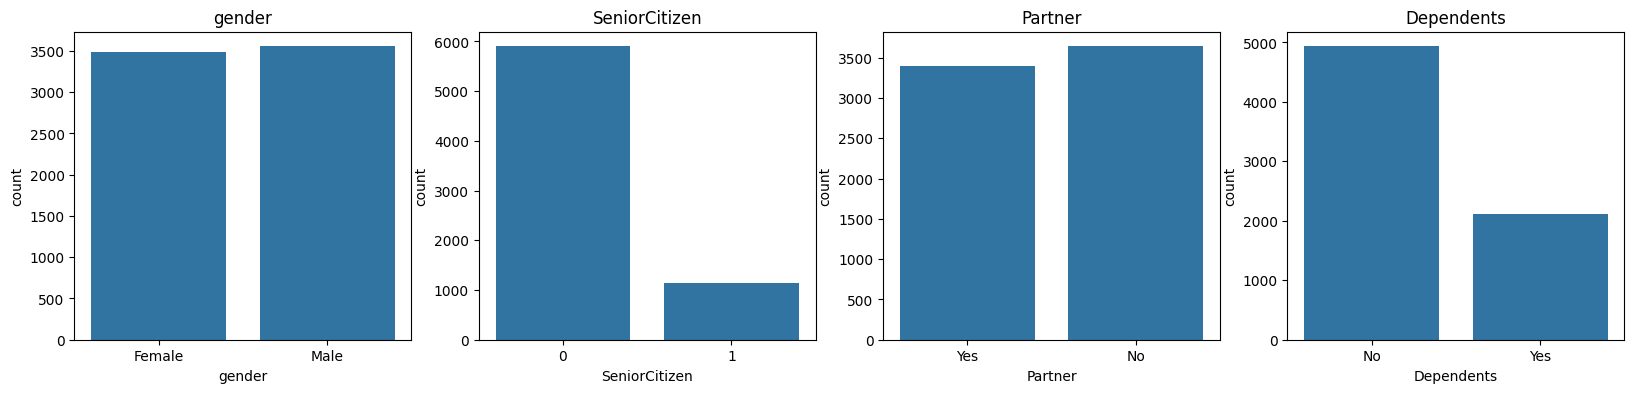

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df)
    ax.set_title(f"{col}")

The majority of customers in the dataset are young adults without dependents. The distribution of gender and marital status among users is balanced. Now, let's examine the correlation between cost and customer churn

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

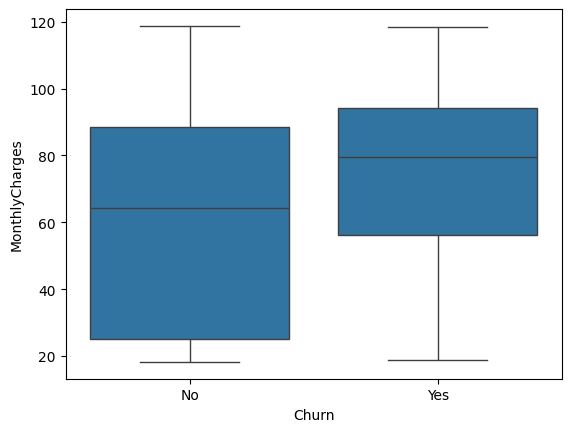

In [6]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

The median monthly charge for customers who cancelled their subscription is higher compared to those who renewed. This suggests that people are more likely to switch to a different brand if they feel that their current mobile service provider's monthly cost is too expensive. The conclusion drawn from this observation appears to be accurate.

Lastly, let's examine the correlation between customer churn and various categorical variables found in the dataset.

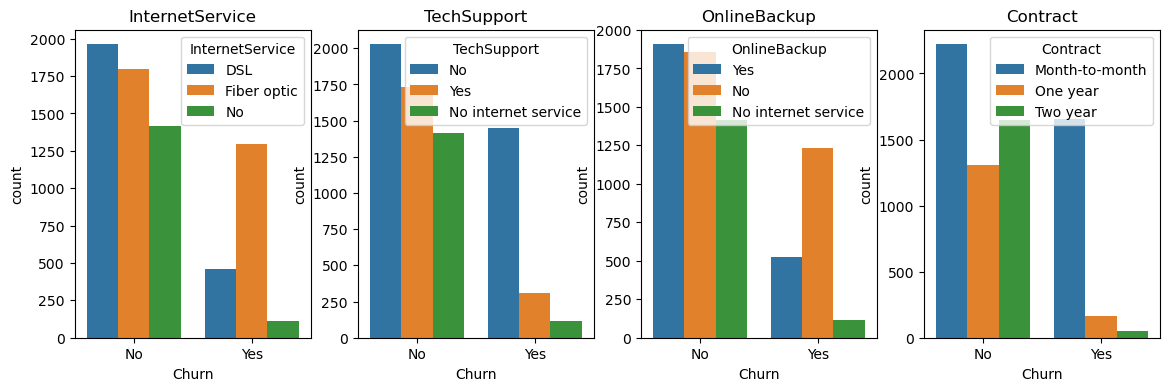

In [ ]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

InternetService: The visual representation reveals that customers who opt for fiber optic Internet tend to switch to other providers more frequently compared to other users. This could be due to the fact that fiber Internet is a pricier option or because of inadequate coverage from the provider.

TechSupport: A significant number of customers who switched providers did not enroll in the tech support service, indicating that they may not have received proper technical assistance, leading to their decision to discontinue their subscription.

OnlineBackup: Many customers who abandoned the service did not sign up for online backup storage, which may have contributed to their decision to switch providers.

Contract: The majority of customers who churned were on a monthly contract, suggesting that the ease of cancelling their subscription before the next billing cycle played a role in their decision to switch providers.

# Preprocessing Data for Customer Churn

In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

# Encoding Categorical Variables

In [ ]:
cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
num_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

# Oversampling

In [ ]:
from sklearn.model_selection import train_test_split

finaldf = finaldf.dropna()
finaldf = finaldf.drop(['customerID'],axis=1)

X = finaldf.drop(['Churn'],axis=1)
y = finaldf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now, let’s oversample the training dataset:

<AxesSubplot:xlabel='Churn', ylabel='count'>

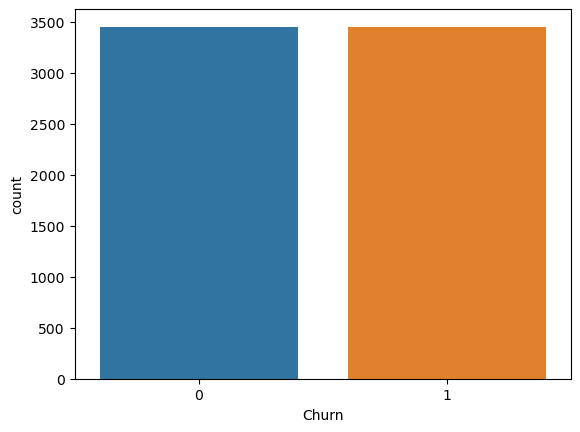

In [ ]:
from imblearn.over_sampling import RandomOverSampler

resampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_oversampled)

In [ ]:
y_train.value_counts()

0    3452
1    3452
Name: Churn, dtype: int64

# Building the Customer Churn Prediction Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

# Customer Churn Prediction Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.7647565704437742


In [ ]:
#The Following code standardizes the train and test dataset.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_s=sc.fit_transform(X_train)
x_test_s=sc.transform(X_test)

In [ ]:
#Training the model:fitting Decision Tree to the training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy', random_state=48)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=48)

In [ ]:
#predicting the test set results
y_pred=classifier.predict(x_test_s)
print(y_pred)

[0 0 1 ... 1 0 1]


C:\Users\dayos\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(y_test)

2481    0
6784    0
6125    1
3052    0
4099    0
       ..
1118    0
4957    0
298     0
3312    0
5585    1
Name: Churn, Length: 2321, dtype: int32


In [ ]:
#To evaluate the performance of model, you can use the following code:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('----------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.65


Confusion Matrix:
[[1102  609]
 [ 210  400]] 


----------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.64      0.73      1711
           1       0.40      0.66      0.49       610

    accuracy                           0.65      2321
   macro avg       0.62      0.65      0.61      2321
weighted avg       0.72      0.65      0.67      2321



Text(0.5, 1.0, 'Confusion Matrix')

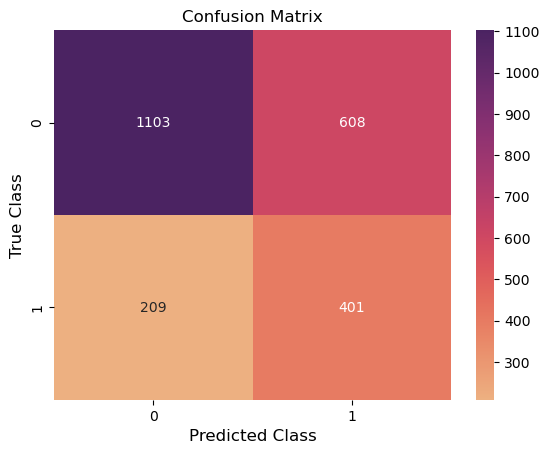

In [ ]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

###  **Conclusion – Churn Prediction Model Performance Analysis**

The Random Forest-based churn prediction model achieved an overall **accuracy of 65%** on the test dataset. While this indicates moderate performance, a deeper look at the **confusion matrix** and **classification report** reveals key strengths and weaknesses:

---

###  **Key Observations**

* **Class 0 (Non-Churners)**:

  * **Precision:** 0.84 → The model is good at identifying actual non-churners.
  * **Recall:** 0.64 → It misses 36% of actual non-churners.
  * **Support:** 1711 instances

* **Class 1 (Churners)**:

  * **Precision:** 0.40 → A high false positive rate (many predicted churners aren't actually churning).
  * **Recall:** 0.66 → The model catches about two-thirds of actual churners, which is decent.
  * **Support:** 610 instances

---

###  **Model Trade-Offs**

* The model **leans towards predicting non-churn** due to the class imbalance, which is common in churn datasets.
* It **recovers 66% of churners**, which is valuable for retention, even if **precision is low**.
* The **f1-score for churners (0.49)** suggests that more tuning or advanced techniques (like SMOTE, XGBoost, or cost-sensitive learning) could significantly boost performance.

---

###  **Conclusion**

The model demonstrates **acceptable recall for churners** but **needs improvement in precision** to reduce false alarms. While the **overall accuracy (65%)** is modest, the recall for churners (66%) gives it practical utility in **flagging at-risk customers**, especially in scenarios where **catching churn is more valuable than avoiding false positives**.

